In [90]:
import time
import plotnine as p9
import pandas as pd 
from tqdm import tqdm

In [ ]:
def timeit(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.time()
        function(*args)
        end = time.time()
        times.append(time.time() - start)
    return min(times)




  0%|          | 0/39 [00:00<?, ?it/s]


 64%|██████▍   | 25/39 [00:00<00:00, 196.50it/s]


 64%|██████▍   | 25/39 [00:15<00:00, 196.50it/s]


 92%|█████████▏| 36/39 [00:20<00:02,  1.37it/s] 


 95%|█████████▍| 37/39 [00:33<00:02,  1.31s/it]


 97%|█████████▋| 38/39 [00:54<00:02,  2.55s/it]


  0%|          | 0/49 [1:30:48<?, ?it/s]
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  0%|          | 0/49 [1:31:35<?, ?it/s]


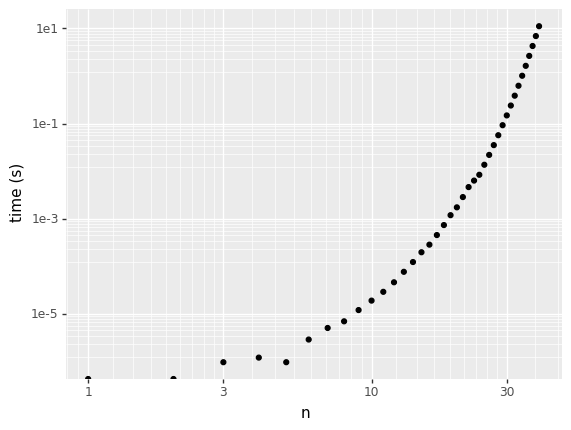

<ggplot: (8786140390988)>

In [92]:
def r(n):
     # preconditions: n an integer >= 1
    if n in (1, 2):
        return 1
    return r(n - 1) + r(n - 2)

ns = range(1, 40)
times = [timeit(r, n) for n in tqdm(ns)] 
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),
            p9.aes(x='n', y='time (s)'))
+ p9.geom_point()
+ p9.scale_x_continuous(trans='log10')
+ p9.scale_y_continuous(trans='log10'))

100%|██████████| 3999/3999 [00:00<00:00, 192899.78it/s]


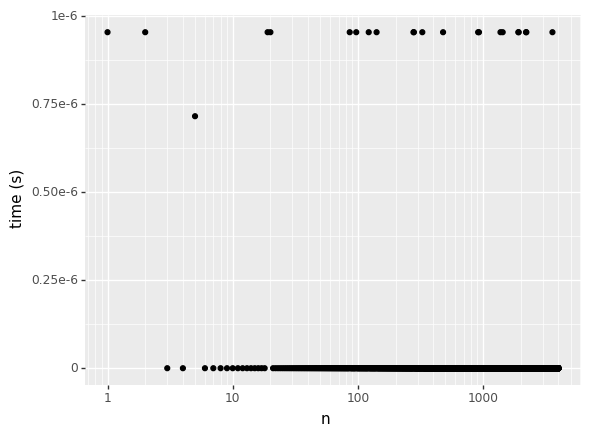

<ggplot: (8786077308766)>

In [101]:
from functools import lru_cache

@lru_cache()
def r(n):
    # preconditions: n an integer >= 1
    if n in (1, 2):
        return 1
    return r(n - 1) + r(n - 2)
ns = range(1, 4000)
times = [timeit(r, n) for n in tqdm(ns)] 
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),
            p9.aes(x='n', y='time (s)'))
+ p9.geom_point()
+ p9.scale_x_continuous(trans='log10'))

Time them as functions of n (5 points), and display this in the way you think is best (5 points). Discuss your choices (e.g. why those n and why you're displaying it that way; 5 points) and your results (5 points).
I display the functions by setting x axis as n, y axis as time, to better displaying the time consumption. I use time.time to calculate the time consuming for each function. In the first function, I set n = 40, and we can see in the first graph, the time consuming is increasing. The time consuming is 2.25s/it in the first function. When I use lru_cache in the second function, according to the graph, we can see that the time consuming is approximate to 0(some outliers, but they are to small to ignore), and the time consuming is 192899.78it/s. As a result, we can conclude that using lru_cache is much more efficient. 
The reason that using lru_cache more efficient is that there are generally memory items that are added once and never used again, and there are items that are added and used frequently. LRU is much more likely to keep the frequently-used items in memory. Citation: https://stackoverflow.com/questions/2058403/why-is-lru-better-than-fifo
